# Problem Setup

- Let $\mathcal{D}=\{(x_i,y_i )\}_{i=1}^N$  denote a training set of $N$ labeled examples where $x_i \in \mathcal{X}$ are images, $y_i \in \mathcal{Y}$ are discrete class labels
- $f_\theta : \mathcal{X} \rightarrow \mathbb{R}^d$ is an embedding (nonlinear) function parametrized by $\theta$
- Goal is to find $f_\theta$ that places embeddings of images of the same class labels close together.
- Shorthand notation
  - $f_i=f_\theta (x_i )$
  - $\mathcal{N}=\{1,…,N\}$
  - $\langle g,h \rangle =g^T h$ (dot product)
- Datasets
  - $\mathcal{P} = \{(i, j) \in \mathcal{N} \times \mathcal{N} : i \neq j\}$
  - $\mathcal{T}_3 =\{(i, j, k) \in \mathcal{N}^3 :i \neq j, y_i = y_j, y_i \neq y_k\}$
  - $\mathcal{T}_{n+1} = \{(i,j,k_1,…,k_{n−1} ) \in \mathcal{N}^{n+1}: i \neq j, y_i=y_j,y_i \neq y_{k_1}, \dots ,y_i \neq y_{k_{n−1} } \}$


# Loss Functions

## Contrastive Loss

- Original loss introduced in paper:
$$
\mathcal{L}(\mathcal{D};\theta) = \sum_{(i, j) \in \mathcal{P}} 1\{y_i=y_j\} \Vert f_i − f_j \Vert_2^2 + 1\{y_i \neq y_j\} \max⁡(0, m−\Vert f_i−f_j \Vert_2)^2
$$

- Modified loss for comparing with other losses
$$
\begin{align*}
\mathcal{L}(\mathcal{D};\theta) &= \sum_{(i, j) \in \mathcal{P}} - 1\{y_i=y_j\} (m - \Vert f_i − f_j \Vert_2^2) + 1\{y_i \neq y_j\} \max⁡(0, m−\Vert f_i−f_j \Vert_2^2) \\
&= \sum_{(i, j) \in \mathcal{P}} - 1\{y_i=y_j\} S_1(x_i, x_j) + 1\{y_i \neq y_j\} \max⁡(0, S_1(x_i, x_j))
\end{align*}
$$
where $S_1(x_i, x_j) = m - \Vert f_i - f_j \Vert_2^2$ is a similarity score function.

## Triplet Loss

$$
\begin{align*}
\mathcal{L}(\mathcal{D};\theta) &= \sum_{(i,j,k)\in \mathcal{T}_3} \max⁡(0, \Vert f_i−f_j \Vert_2^2 − \Vert f_i−f_k \Vert_2^2 + m) \\
&= \sum_{(i,j,k)\in \mathcal{T}_3} \max⁡(0, S_1(x_i, x_k) − S_1(x_i, x_j) + m)
\end{align*}
$$

## $(N+1)$-tuplet Loss

$$
\begin{align*}
\mathcal{L}(\mathcal{D};\theta) &= \sum_{(i,j,k_1,\dots,k_{n−1} ) \in \mathcal{T}_{n+1}} \log⁡⁡\left(1+\sum_{l=1}^{n−1} \exp\left(\langle f_i,f_{k_l} \rangle − \langle f_i,f_j \rangle\right) \right) \\
&= \sum_{(i,j,k_1,\dots,k_{n−1} ) \in \mathcal{T}_{n+1}} \log⁡⁡\left(1+\sum_{l=1}^{n−1} \exp\left(S_2(x_i, x_{k_l}) − S_2(x_i, x_j) \right) \right) \\
&= -\sum_{(i,j,k_1,\dots,k_{n−1} ) \in \mathcal{T}_{n+1}} \log⁡⁡\frac{\exp(S_2(x_i, x_j))}{\exp(S_2(x_i, x_j))+\sum_{l=1}^{n−1} \exp(S_2(x_i, x_{k_l}))}
\end{align*}
$$

where $S_2(x_i, x_j) = \langle x_i, x_j \rangle$ is another similarity score function.

## Random Graph Loss

$$
\begin{align*}
\mathcal{L}(\mathcal{D};\theta) &= \sum_{(i, j) \in \mathcal{P}} \log⁡(1+\exp S_1(x_i, x_j))−1\{y_i=y_j\} S_1(x_i, x_j) \\
&= -\sum_{(i, j) \in \mathcal{P}} \left[ 1\{y_i=y_j\} \log \frac{\exp\left(S_1(x_i, x_j)\right)}{1+ \exp\left(S_1(x_i, x_j)\right)} + 1\{y_i \neq y_j\}\log \frac{1}{1+ \exp\left(S_1(x_i, x_j)\right)} \right]\\
\end{align*}
$$

# Loss Function Comparison

In this section, we compare the $(n+1)$-tuplet loss function and the random graph loss function.

- For comparison, use the Euclidean distance based similarity score $S_1$ for both loss functions.
- Use the $(n+1)$-tuplet dataset $\mathcal{T}_{n+1}$ for both loss functions. Note that the $(n+1)$-tuplet loss function uses $n$ pairwise similarity scores for each $(n+1)$ tuplet. The random graph loss function could use all $n(n+1)$ pairwise similarity scores for each tuplet. However, to isolate the effects of loss functions, use the same pairs used in the $(n+1)$-tuplet loss function.

The following two are compared:

$$
\mathcal{L}(\mathcal{D}; \theta) = -\sum_{(i,j,k_1,\dots,k_{n−1} ) \in \mathcal{T}_{n+1}} \log⁡⁡\frac{\exp(S_1(x_i, x_j))}{\exp(S_1(x_i, x_j))+\sum_{l=1}^{n−1} \exp(S_1(x_i, x_{k_l}))}
$$


$$
\mathcal{L}(\mathcal{D}; \theta) = -\sum_{(i,j,k_1,\dots,k_{n−1} ) \in \mathcal{T}_{n+1}} \left[ \log \frac{\exp\left(S_1(x_i, x_j)\right)}{1+ \exp\left(S_1(x_i, x_j)\right)} + \sum_{l=1}^{n-1} \log \frac{1}{1 + \exp(S_1(x_i, x_{k_l}))} \right]
$$

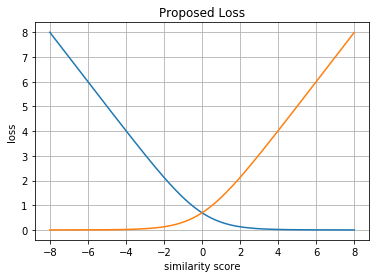

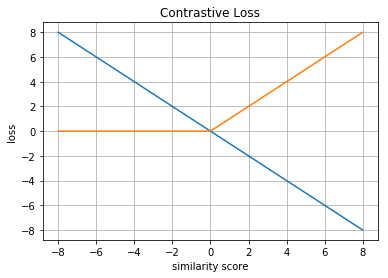

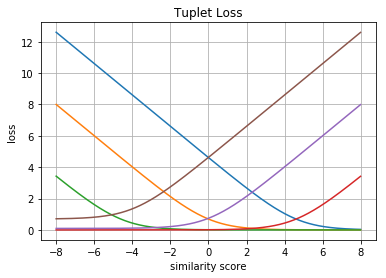

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-8.0, 8.0, 0.01)
p = -np.log( np.exp(t) / (1 + np.exp(t)))
n = -np.log( 1 / (1 + np.exp(t)))

fig, ax = plt.subplots()
ax.plot(t, p)
ax.plot(t, n)

ax.set(xlabel='similarity score', ylabel='loss',
       title='Proposed Loss')
ax.grid()

#fig.savefig("proposed_loss.png")

t = np.arange(-8.0, 8.0, 0.01)
p = -t
n = np.maximum(0, t)

fig, ax = plt.subplots()
ax.plot(t, p)
ax.plot(t, n)

ax.set(xlabel='similarity score', ylabel='loss',
       title='Contrastive Loss')
ax.grid()

#fig.savefig("contrastive_loss.png")

t = np.arange(-8.0, 8.0, 0.01)
p1 = -np.log( np.exp(t) / (100 + np.exp(t)))
p2 = -np.log( np.exp(t) / (1 + np.exp(t)))
p3 = -np.log( np.exp(t) / (0.01 + np.exp(t)))
n1 = -np.log( 100 / (100 + np.exp(t)))
n2 = -np.log( 1 / (1.1 + np.exp(t)))
n3 = -np.log( 0.01 / (0.02 + np.exp(t)))

fig, ax = plt.subplots()
ax.plot(t, p1)
ax.plot(t, p2)
ax.plot(t, p3)
ax.plot(t, n1)
ax.plot(t, n2)
ax.plot(t, n3)

ax.set(xlabel='similarity score', ylabel='loss',
       title='Tuplet Loss')
ax.grid()

#fig.savefig("tuplet_loss.png")

plt.show()